## Laboratory work 1: The human brain connectome

Dear students!

In our first laboratory activity, we would like to invite you to explore the human brain connectome that was obtained as part of our research project __[Human Connectome Project (HCP)](https://www.humanconnectome.org/)__ (in the following __[article](https://link.springer.com/article/10.1007/s11571-017-9445-1)__).

You have been provided with __[several files](https://drive.google.com/drive/folders/1aLmWQfYGP5jOa0cojA5zgpPP3sMeso_Li7r9KZaJ6GVSpMupYsIjeBmKa3oZ69LXiuSaWyul?usp=sharing)__ for the same connectome at different resolutions, in case you would like to manipulate the data on smaller graphs or use some more complex algorithms.

However, it is recommended to present the final results at the highest possible resolution of the connectome.

Total points for all problems: `100`

In [ ]:
from collections import defaultdict
from typing import Union
import os.path as osp
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import networkx as nx
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors



### Utils

In [ ]:
def brain_area_function(
    brain_area_name: str,
    map: dict[str, str] = None,
) -> str:
    """
    Retrieves the function of a brain area by mapping its name through a provided dictionary.
    If the brain area name is not found, returns the original name.

    Args:
        brain_area_name (str):
            The name of the brain area.
        map (dict[str, str], optional):
            A dictionary mapping brain area names to their respective functions.
            Defaults to an empty dictionary if not provided.

    Returns:
        str: The mapped function of the brain area if available, otherwise the original name.
    """
    if map is None:
        map = {
            "Cortical": "Higher cognitive functions, thinking",
            "Subcortical": "Movement regulation, emotions, memory",
            "Parstriangularis": "Speech processing, language comprehension",
            "Precentral": "Movement control (motor cortex)",
            "Superiorparietal": "Spatial perception, attention",
            "Lateraloccipital": "Visual information processing",
            "Entorhinal": "Memory formation, connection with the hippocampus",
            "Left-pallidum": "Movement, regulation of motor functions",
            "Right-pallidum": "Movement, regulation of motor functions",
            "Posteriorcingulate": "Memory, attention, orientation",
            "Caudalmiddlefrontal": "Planning, cognitive control",
            "Right-thalamus-proper": "Transmission of sensory signals to the cortex",
            "Left-thalamus-proper": "Transmission of sensory signals to the cortex",
            "Left-amygdala": "Emotions, fear, aggression",
            "Right-amygdala": "Emotions, fear, aggression",
            "Parsopercularis": "Speech production, sound processing",
            "Caudalanteriorcingulate": "Emotion control, decision-making",
            "Parsorbitalis": "Regulation of behavior, social interactions",
            "Medialorbitofrontal": "Training, evaluation of remuneration",
            "Right-accumbens-area": "Motivation, reward system",
            "Left-accumbens-area": "Motivation, reward system",
            "Lingual": "Visual information processing",
            "Right-caudate": "Movement control, training",
            "Left-caudate": "Movement control, training",
            "Postcentral": "Sensory information, sense of touch",
            "Temporalpole": "Memory, emotion processing",
            "Precuneus": "Consciousness, self-awareness, attention",
            "Middletemporal": "Processing of hearing and visual information",
            "Transversetemporal": "Sound and speech analysis",
            "Insula": "Body sensations, emotions, pain perception",
            "Paracentral": "Control of leg and trunk movements",
            "Left-putamen": "Movement, skill formation",
            "Right-putamen": "Movement, skill formation",
            "Lateralorbitofrontal": "Emotion control, decision-making",
            "Isthmuscingulate": "Emotions, memory, behavior regulation",
            "Fusiform": "Face and object recognition",
            "Rostralmiddlefrontal": "Planning, decision-making",
            "Supramarginal": "Speech comprehension, sensorimotor integration",
            "Right-hippocampus": "Formation of long-term memory",
            "Left-hippocampus": "Formation of long-term memory",
            "Cuneus": "Processing of visual stimuli",
            "Bankssts": "Speech analysis, sound perception",
            "Frontalpole": "Abstract thinking, planning",
            "Superiortemporal": "Speech and sound processing",
            "Inferiorparietal": "Integration of hearing, vision, and attention",
            "Pericalcarine": "Primary visual cortex, image processing",
            "Parahippocampal": "Memory, spatial orientation",
            "Brain-stem": "Vital functions (breathing, heart)",
            "Superiorfrontal": "Attention control, motor planning",
            "Rostralanteriorcingulate": "Emotions, behavior control",
            "Inferiortemporal": "Object recognition, visual image processing",
        }

    return map.get(brain_area_name, brain_area_name)


def canonize_key(
    key: str,
) -> str:
    """
    Converts a given key into a standardized format by:
    - Removing hemisphere indicators (`lh`, `rh`).
    - Replacing periods with underscores.
    - Stripping numerical suffixes.
    - Capitalizing the first letter.

    Args:
        key (str):
            The key to be standardized.

    Returns:
        str: A canonized version of the key.
        ```
    """
    splitted_key = list(filter(
        lambda s: s not in ['lh', 'rh'],
        key.lower().replace('.', '_').split('_')
    ))

    canonized_key = splitted_key[0] if splitted_key else key
    canonized_key = canonized_key.rstrip('0123456789').capitalize()

    return canonized_key


def get_neuron_info(
    neuron_data: dict[str, str],
    map: dict[str, str] = None,
) -> tuple[str, str, str, str]:
    """
    Extracts and standardizes neuron information, including its region, name, hemisphere,
    and function, using optional mapping.

    Args:
        neuron_data (dict[str, str]):
            A dictionary containing neuron attributes, including:
            - "dn_region": The region where the neuron is located.
            - "dn_name": The name of the neuron.
            - "dn_hemisphere": The hemisphere (left/right) where the neuron is located.
        map (dict[str, str], optional):
            A dictionary mapping neuron attributes to their standardized values.
            Defaults to an empty dictionary if not provided.

    Returns:
        tuple[str, str, str, str]: A tuple containing:
            - Standardized region name.
            - Standardized neuron name.
            - Standardized hemisphere.
            - Mapped function of the neuron.
        ```
    """

    region = canonize_key(neuron_data.get('dn_region', 'N/A'))
    name = canonize_key(neuron_data.get('dn_name', 'N/A'))
    hemisphere = canonize_key(neuron_data.get('dn_hemisphere', 'N/A'))
    function = brain_area_function(name, map=map)

    # return (
    #     translate_key(region, map=map),
    #     translate_key(name, map=map),
    #     translate_key(hemisphere, map=map),
    #     function,
    # )
    return (
        region,
        name,
        hemisphere,
        function,
    )


In [ ]:
def get_node_colors(
    node_attrs: list,
) -> list:
    """
    Assigns RGB colors to unique node attributes and returns a list of corresponding colors.

    Args:
        node_attrs (list):
            A list of node attributes, where each attribute represents a category.
            Nodes with the same attribute will be assigned the same color.

    Returns:
        list:
            A list of RGB color strings (formatted as "rgb(R, G, B)") corresponding to each
            attribute in the input list.
    """

    # Obtain unique attributes
    unique_attrs = list(set(node_attrs))

    # Assign RGB colors to the attributes
    cmap = plt.get_cmap("turbo", len(unique_attrs))
    color_map = {
        attr: f"rgb({int(cmap(i)[0]*255)}, {int(cmap(i)[1]*255)}, {int(cmap(i)[2]*255)})"
        for i, attr in enumerate(unique_attrs)
    }

    # Assign corresponding colors to the nodes
    node_colors = [color_map[attr] for attr in node_attrs]

    return node_colors


In [ ]:
def plot_connectome(
    G: nx.Graph,
    node_colors: Union[str, list[str]] = 'red',
    show_legend: bool = True,
):
    """
    Plots a 3D connectome graph based on node positions and connectivity.

    Args:
        G:
            A NetworkX graph containing nodes with attributes 'dn_position_x',
            'dn_position_y', and 'dn_position_z'.
        node_colors (str or list, optional):
            The color(s) assigned to nodes. Can be a single color or a list matching
            the number of nodes.
        show_legend (bool, optional):
            Whether to display a legend grouping nodes by color. Defaults to True.

    Returns:
        None: Displays an interactive 3D plot of the connectome.
    """

    # Extract node positions
    positions = {node: (
        float(data['dn_position_x']),
        float(data['dn_position_y']),
        float(data['dn_position_z'])
        )
        for node, data in G.nodes(data=True)
    }

    # Edges coordinates
    edge_x = []
    edge_y = []
    edge_z = []

    for edge in G.edges():
        x0, y0, z0 = positions[edge[0]]
        x1, y1, z1 = positions[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    # Nodes coordinates
    node_x = [pos[0] for pos in positions.values()]
    node_y = [pos[1] for pos in positions.values()]
    node_z = [pos[2] for pos in positions.values()]

    # Additional node info
    node_info = [
        "Region: {0}<br>Name: {1}<br>Hemisphere: {2}<br>Function: {3}".format(*get_neuron_info(data))
        for node, data in G.nodes(data=True)
    ]

    # Create 3D plot
    fig = go.Figure(layout={'width': 1200, 'height': 800})

    # Plot edges
    fig.add_trace(go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        mode='lines',
        line=dict(color='rgba(0, 0, 255, 0.1)', width=1),
        name='edges',
        hoverinfo='skip',
        showlegend=False,
    ))

    # Plot nodes
    fig.add_trace(go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers',
        marker=dict(size=5, color=node_colors),
        text=node_info,
        hoverinfo='text',
        name='nodes',
        showlegend=False,
    ))

    # Configure plot appearance
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title="Brain Connectome"
    )

    # Group nodes by color for legend
    color_groups = defaultdict(list)
    for node, color in zip(G.nodes(), node_colors):
        region, name, hemisphere, function = get_neuron_info(G.nodes[node])
        color_groups[color].append(name)

    if show_legend:
        for color, nodes in color_groups.items():
            fig.add_trace(go.Scatter3d(
                x=[None], y=[None], z=[None],
                mode='markers',
                marker=dict(size=5, color=color),
                name=f"{'<br>'.join(set(nodes))}",
                hoverinfo='skip',
                legendwidth=3,
            ))

        fig.update_layout(
            legend=dict(
                x=1.05,
                y=1,
                xanchor="left",
                yanchor="top",
                bgcolor="rgba(255, 255, 255, 0.7)",
                font=dict(size=10),
                itemwidth=30,
                bordercolor="black",
                borderwidth=1,
                tracegroupgap=5,
            )
        )

    fig.show()


## 0. How to plot connectome

In [ ]:
graph_path = osp.join(".", "/content/brain_scale500.graphml")
G = nx.read_graphml(graph_path)

In [ ]:
# Extract unique regions and assign colors
color_by='dn_name'
node_names = [
    canonize_key(data.get(color_by, 'Unknown'))
    for node, data in G.nodes(data=True)
]
node_colors = get_node_colors(node_names)

# Plot the connectome
plot_connectome(G, node_colors=node_colors)

## Problem 1. Graph analysis (25 points)

### 1.1. The main characteristics of the graph, clustering coefficient

- Select the largest connected component from the graph. Here and further in the laboratory we will work with it.

- Calculate the main characteristics of the graph (clustering coefficient, diameter, radius, average length of the shortest path)

- Construct a histogram of the distribution of clustering coefficients of individual vertices

- Plot the dependence of the clustering coefficient on the degree of the vertex

**Select the largest connected component**

In [ ]:
largest_cc = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_cc).copy()

**Compute graph characteristics**

In [ ]:
clustering_coeff = nx.average_clustering(G_largest)
diameter = nx.diameter(G_largest)
radius = nx.radius(G_largest)
avg_shortest_path = nx.average_shortest_path_length(G_largest)

print(f"Clustering Coefficient: {clustering_coeff}")
print(f"Diameter: {diameter}")
print(f"Radius: {radius}")
print(f"Average Shortest Path Length: {avg_shortest_path}")

Clustering Coefficient: 0.6390347805374883
Diameter: 9
Radius: 5
Average Shortest Path Length: 3.0968329646572026


**Histogram of clustering coefficients**

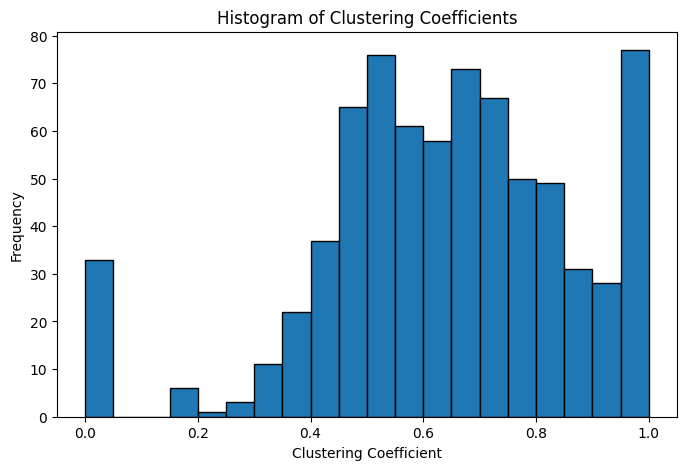

In [ ]:
clustering_values = nx.clustering(G_largest)
plt.figure(figsize=(8, 5))
plt.hist(clustering_values.values(), bins=20, edgecolor='black')
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.title("Histogram of Clustering Coefficients")
plt.show()

**Plot the dependence of the clustering coefficient on the degree of the vertex**

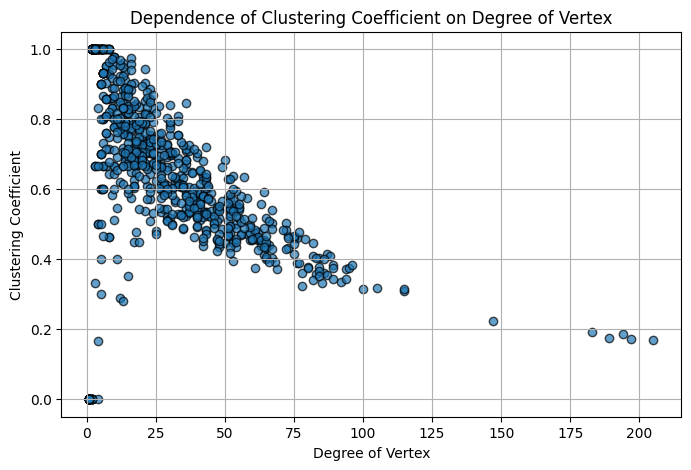

In [ ]:
degrees = dict(G_largest.degree())
clustering_coeffs = nx.clustering(G_largest)

# Convert to lists
degree_values = np.array(list(degrees.values()))
clustering_values = np.array(list(clustering_coeffs.values()))

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(degree_values, clustering_values, alpha=0.7, edgecolors='k')
plt.xlabel("Degree of Vertex")
plt.ylabel("Clustering Coefficient")
plt.title("Dependence of Clustering Coefficient on Degree of Vertex")
plt.grid(True)
plt.show()

### 1.2. Path length

- Calculate the average length of the shortest path between two vertices of the graph

- Plot a histogram of the dependence of the average length of the shortest path on the degree of the vertex

**Compute the Average Shortest Path Length**

In [ ]:
avg_shortest_path_length = nx.average_shortest_path_length(G_largest)
print(f"Average shortest path length: {avg_shortest_path_length:.4f}")
shortest_path_lengths = dict(nx.shortest_path_length(G_largest))
node_avg_path_length = {node: np.mean(list(paths.values())) for node, paths in shortest_path_lengths.items()}
degrees = dict(G_largest.degree())

Average shortest path length: 3.0968


**Plot degree distribution (Histogram)**

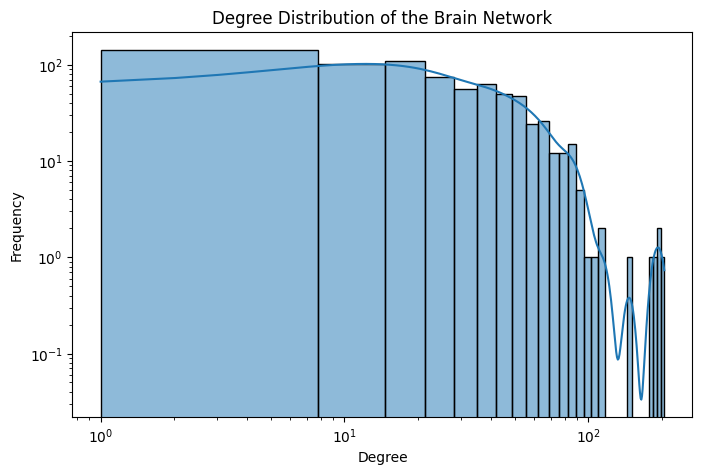

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(degree_values, bins=30, kde=True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of the Brain Network")
plt.xscale("log")
plt.yscale("log")
plt.show()

### 1.3. Distribution of node degrees

- What is the distribution of node degrees? Run goodness-of-fit test and estimate parameters of the distribution.

**Importing Power Law**

In [ ]:
!pip install powerlaw
import powerlaw

**Fit a power-law distribution**

In [ ]:
fit = powerlaw.Fit(degree_values)
alpha = fit.power_law.alpha
print(f"Estimated Power-law exponent: {alpha:.4f}")

Calculating best minimal value for power law fit
Estimated Power-law exponent: 4.8817


**Goodness-of-fit test (Kolmogorov-Smirnov test)**

In [ ]:
import powerlaw

degree_values = np.array(list(dict(G_largest.degree()).values()))

min_degree = 2
filtered_degrees = degree_values[degree_values > min_degree]

fit = powerlaw.Fit(filtered_degrees, xmin=min_degree, verbose=False)
D, p_value = fit.distribution_compare('power_law', 'lognormal')

print(f"KS Test: D = {D:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("The degree distribution follows a power-law.")
else:
    print("The degree distribution does not fit a power-law well.")


KS Test: D = -430.3794, p-value = 0.0000
The degree distribution does not fit a power-law well.


In [ ]:
D_exp, p_exp = fit.distribution_compare('power_law', 'exponential')
print(f"Power-Law vs Exponential: D = {D_exp:.4f}, p-value = {p_exp:.4f}")

D_trunc, p_trunc = fit.distribution_compare('power_law', 'truncated_power_law')
print(f"Power-Law vs Truncated Power-Law: D = {D_trunc:.4f}, p-value = {p_trunc:.4f}")


Power-Law vs Exponential: D = -436.4818, p-value = 0.0000
Power-Law vs Truncated Power-Law: D = -253.5033, p-value = 0.0000


Assuming nested distributions


### 1.4. Determine which are the most important and significant neurons in our brain?

**Compute centralities**

In [ ]:
degree_centrality = nx.degree_centrality(G_largest)
betweenness_centrality = nx.betweenness_centrality(G_largest)
eigenvector_centrality = nx.eigenvector_centrality(G_largest)

**Find top 5 important neurons**

In [ ]:
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Neurons by Degree Centrality:", top_degree)
print("Top 5 Neurons by Betweenness Centrality:", top_betweenness)
print("Top 5 Neurons by Eigenvector Centrality:", top_eigenvector)

Top 5 Neurons by Degree Centrality: [('503', 0.27443105756358765), ('1008', 0.2637215528781794), ('504', 0.2597054886211513), ('502', 0.25301204819277107), ('1009', 0.24497991967871485)]
Top 5 Neurons by Betweenness Centrality: [('1008', 0.2421469370007891), ('502', 0.18009177720732064), ('1009', 0.14644286031118997), ('503', 0.14220005565925148), ('504', 0.07271998320811557)]
Top 5 Neurons by Eigenvector Centrality: [('502', 0.16786807663662084), ('503', 0.16740725044129698), ('1008', 0.1665328368755248), ('504', 0.15834180189207844), ('1009', 0.14440977691784915)]


**Insights**

*   Neurons 503, 1008, 504, 502, and 1009 are the most highly connected neurons in the brain, making them essential for network communication.

*   Neuron 1008 is a critical bridge in the brain network, ensuring efficient information flow.
*   Neuron 502 is the most influential neuron, as it connects to other highly connected nodes.
*   Removing any of these neurons could significantly impact the brain's connectivity




### 1.5. Is the human brain a complex network? Why?

## Problem 2. Labeling of the brain connectome (30 points)

- Create an automatic labeling of the brain's connectome. Labeling refers to the division of connections into a number of groups, and the assignment of each vertex to one of these groups.

- Try several different labeling algorithms and describe how you chose the values for their parameters.

- Compare the results of the different algorithms to each other and to the original labeling.

In [ ]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!pip install --force-reinstall python-louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 97.5 MB/s eta 0:00:00
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=1ff58807a5a6799211a0da2dd8437d0c6c19ce801135cb788ce296bf092e4b23
  Stored in directory: /root/.cache/pip/wheels/11/c1/e7/f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: p

In [ ]:
import community as community_louvain

# Compute the best partition using the Louvain method
louvain_partition = community_louvain.best_partition(G_largest)

# Visualize the labeled connectome
plot_connectome(G_largest, node_colors=[louvain_partition[node] for node in G_largest.nodes()])


AttributeError: module 'community' has no attribute 'best_partition'

In [ ]:
from sklearn.cluster import SpectralClustering

# Convert graph to adjacency matrix
adj_matrix = nx.to_numpy_array(G_largest)

# Apply Spectral Clustering
num_clusters = 5  # Assume 5 clusters
spectral = SpectralClustering(n_clusters=num_clusters, affinity='precomputed')
labels = spectral.fit_predict(adj_matrix)

# Assign labels to nodes
spectral_labels = {node: labels[i] for i, node in enumerate(G_largest.nodes())}

# Visualize
plot_connectome(G_largest, node_colors=[spectral_labels[node] for node in G_largest.nodes()])


**Algorithm 3: K-Means Clustering (Using Node Embeddings)**

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from node2vec import Node2Vec
import gensim

# Ensure correct library versions to avoid numpy errors
import subprocess
subprocess.run(["pip", "install", "--upgrade", "numpy", "gensim", "node2vec"], check=True)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

Computing transition probabilities:   0%|          | 0/748 [00:00<?, ?it/s]

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

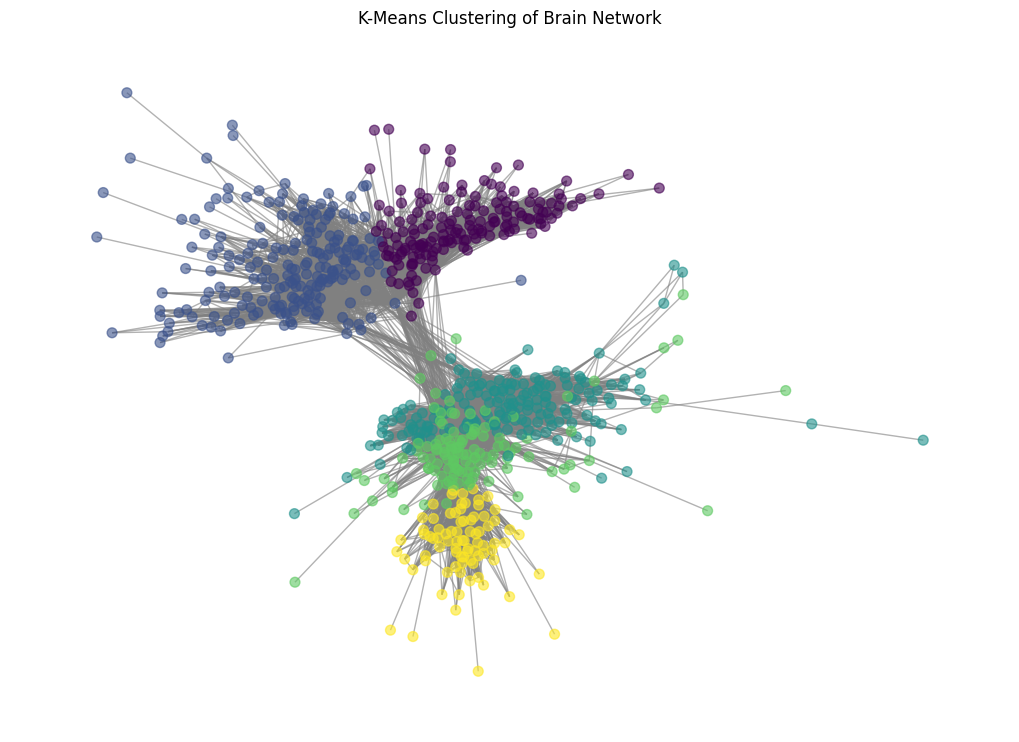

In [ ]:
# Step 1: Generate Node2Vec Embeddings
node2vec = Node2Vec(
    G_largest,
    dimensions=64,
    walk_length=15,  # Reduced for efficiency
    num_walks=100,   # Reduced for efficiency
    workers=4
)

model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Step 2: Convert Nodes to Vectors
node_embeddings = np.array([model.wv[str(node)] for node in G_largest.nodes()])

# Step 3: Apply K-Means Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(node_embeddings)

# Step 4: Assign Labels to Nodes
kmeans_partition = {node: int(kmeans_labels[i]) for i, node in enumerate(G_largest.nodes())}

# Step 5: Assign Labels to Graph
nx.set_node_attributes(G_largest, kmeans_partition, "kmeans_label")

# Step 6: Fixed Visualization Function
def plot_graph(G, labels, title="Graph Visualization"):
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G)  # Layout for visualization

    # Normalize node colors
    unique_labels = list(set(labels.values()))
    norm = mcolors.Normalize(vmin=min(unique_labels), vmax=max(unique_labels))
    cmap = cm.get_cmap('viridis', len(unique_labels))

    # Draw the graph with node colors based on labels
    nx.draw(
        G, pos, node_color=[cmap(norm(labels[node])) for node in G.nodes()],
        node_size=50, edge_color="gray", alpha=0.6, with_labels=False
    )

    # Create a colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label="Cluster Label")

    plt.title(title)
    plt.show()

# Call the function
plot_graph(G_largest, kmeans_partition, title="K-Means Clustering of Brain Network")


In [ ]:
from sklearn.cluster import KMeans
from node2vec import Node2Vec  # Node2Vec for embeddings

# Generate node embeddings
node2vec = Node2Vec(G_largest, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Convert nodes to vectors
node_embeddings = np.array([model.wv[str(node)] for node in G_largest.nodes()])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(node_embeddings)

# Assign labels to nodes
kmeans_partition = {node: kmeans_labels[i] for i, node in enumerate(G_largest.nodes())}

# Visualize
plot_connectome(G_largest, node_colors=[kmeans_partition[node] for node in G_largest.nodes()])


## Problem 3. Assortativity (15 points)

- Рассмотрите:
  - Коннектом целиком
  - Различные области, найденные с помощью автоматической разметки, по отдельности
- Посчитайте для них ассортативность, постройте необходимые графики
- Проанализируйте результаты
- Consider:
  - Connect as a whole
  - Various areas found using automatic labeing individually
- Calculate the assortativity for them, plot the necessary graphs
- Analyze the results

#**In this question, I will follow following steps to answer the questions**

 Step 1: Compute Assortativity for the Entire Brain Network

 Step 2: Compute Assortativity for Each Detected Region

 Step 3: Visualizing Assortativity

 Step 4: Degree Assortativity Scatter Plot

 Step 5: Interpretation and Analysis

**Compute degree assortativity for the entire network**

In [ ]:
degree_assortativity_whole = nx.degree_assortativity_coefficient(G_largest)
print(f"Degree Assortativity of the Whole Brain Network: {degree_assortativity_whole:.4f}")


Degree Assortativity of the Whole Brain Network: -0.0236


**Louvain Community Assortativity**

In [ ]:
from sklearn.cluster import SpectralClustering

# Convert graph to adjacency matrix
adj_matrix = nx.to_numpy_array(G_largest)

# Perform Spectral Clustering
n_clusters = 5  # Adjust as needed
spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
spectral_labels = spectral.fit_predict(adj_matrix)

# Assign Spectral Clustering labels to nodes
spectral_partition = {node: spectral_labels[i] for i, node in enumerate(G_largest.nodes())}


In [ ]:
# Assign labels to nodes correctly
for node, label in louvain_partition.items():
    G_largest.nodes[node]['louvain_label'] = int(label)  # Ensure integer labels

for node, label in spectral_partition.items():
    G_largest.nodes[node]['spectral_label'] = int(label)

for node, label in kmeans_partition.items():
    G_largest.nodes[node]['kmeans_label'] = int(label)

In [ ]:
assortativity_louvain = nx.attribute_assortativity_coefficient(G_largest, 'louvain_label')
print(f"Louvain Community Assortativity: {assortativity_louvain:.4f}")


Louvain Community Assortativity: 0.7908


**Spectral Clustering Assortativity**


In [ ]:
assortativity_spectral = nx.attribute_assortativity_coefficient(G_largest, 'spectral_label')
print(f"Spectral Clustering Assortativity: {assortativity_spectral:.4f}")

Spectral Clustering Assortativity: 0.8507


**K-Means Clustering Assortativity**


In [ ]:
assortativity_kmeans = nx.attribute_assortativity_coefficient(G_largest, 'kmeans_label')
print(f"K-Means Clustering Assortativity: {assortativity_kmeans:.4f}")

K-Means Clustering Assortativity: 0.7895


**Assortativity Bar Plot**



<ipython-input-29-59e6a46c0df1>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




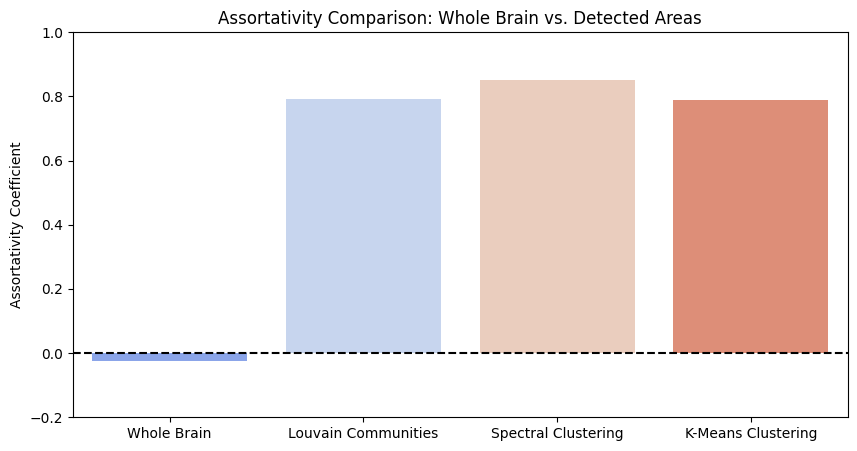

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Store assortativity values
assortativity_values = {
    "Whole Brain": degree_assortativity_whole,
    "Louvain Communities": assortativity_louvain,
    "Spectral Clustering": assortativity_spectral,
    "K-Means Clustering": assortativity_kmeans
}

# Convert to lists for plotting
categories = list(assortativity_values.keys())
values = list(assortativity_values.values())

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=categories, y=values, palette="coolwarm")
plt.ylabel("Assortativity Coefficient")
plt.title("Assortativity Comparison: Whole Brain vs. Detected Areas")
plt.ylim(-0.2, 1.0)  # Adjust based on values
plt.axhline(0, color='black', linestyle='dashed')
plt.show()

**Degree Assortativity Scatter Plot**

visualize the relationship between degree and assortativity.

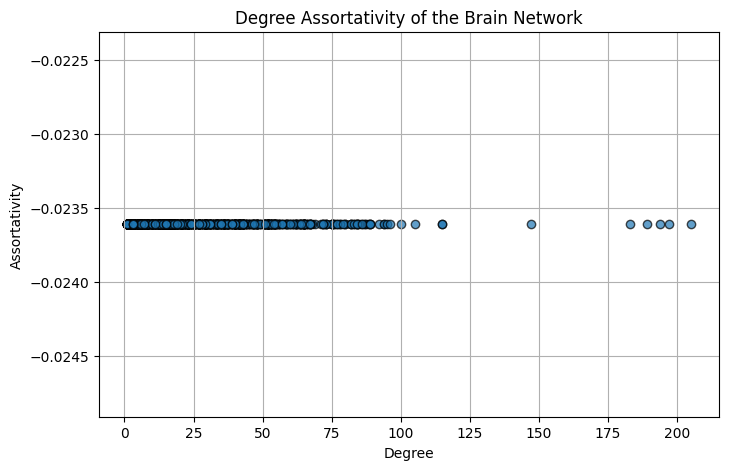

In [ ]:
degrees = dict(G_largest.degree())
degree_values = np.array(list(degrees.values()))

plt.figure(figsize=(8, 5))
plt.scatter(degree_values, [degree_assortativity_whole] * len(degree_values), alpha=0.7, edgecolors='k')
plt.xlabel("Degree")
plt.ylabel("Assortativity")
plt.title("Degree Assortativity of the Brain Network")
plt.grid(True)
plt.show()

## Problem 4. Transcranial magnetic stimulation (30 points)

__[Transcranial magnetic stimulation (TMS)](https://en.wikipedia.org/wiki/Transcranial_magnetic_stimulation)__ - a method that allows noninvasively stimulating the cerebral cortex. It is used for the rehabilitation of patients (for example, with motor disorders), and for the treatment of various diseases: Parkinson's disease, epilepsy, depression, schizophrenia, and others.

We would like to suggest that you conduct a TMS on your "patient". For this, you will need:

- "Weigh" the edges of the graph. For example, using some metric that decreases with increasing distance between vertices.

- Apply TMS to different areas of the brain. See how far the signal will spread, which areas it will affect, and what functions these areas are responsible for.

  Various methods can be used to implement signal propagation: `message passing', `random walk', `heat diffusion' and others.

  Try different methods (two or more), compare the results.

---

To determine which areas of the brain should be targeted with TMS, you can refer to scientific articles. For example:

__[Evidence-based guidelines on the therapeutic use of repetitive transcranial magnetic stimulation (rTMS)](https://www.sciencedirect.com/science/article/pii/S1388245719312799?via%3Dihub)__.

This article contains many studies that stimulated various areas of the brain using TMS. It also describes the symptoms of patients and the results of TMS use.

---

For example, in the picture below you can see:

- The patient's symptom is a motor disorder of the hand as a result of stroke.

- The area of application of TMS is the M1 zone. You can use a __[map of brain regions](https://atlas.brain-map.org/atlas?atlas=265297126)__ to orient yourself in the areas of a brain.

- The result of the therapy is an improvement in the patient's motor functions.

![lab_1_example.png](attachment:lab_1_example.png)

---

Good luck!